# Authorization

In [1]:
from flickrapi import FlickrAPI

In [2]:
import requests
import json
import urllib
import urllib2

In [3]:
FLICKR_PUBLIC = 'b70e62e3be596a590f1b16f1b035cb4e'
FLICKR_SECRET = 'eda0e059dc51d5ce'

In [4]:
flickr = FlickrAPI(FLICKR_PUBLIC, FLICKR_SECRET, format='parsed-json')

#  Get user_id with username

In [5]:
reqs = flickr.people.findByUsername(username = 'katiehalee')
print reqs['user']['id']

86497885@N04


# User Info

In [12]:
user = '86497885@N04'

reqs = flickr.people.getinfo(user_id = user)
print "username: " + reqs['person']['username']['_content']
print "Description: " + reqs['person']['description']['_content']
print "num of photos: " + str(reqs['person']['photos']['count']['_content'])

username: katiehalee
Description: Katie Hale. 20. soccer. photography.
num of photos: 269


## Photos of a User with user_id

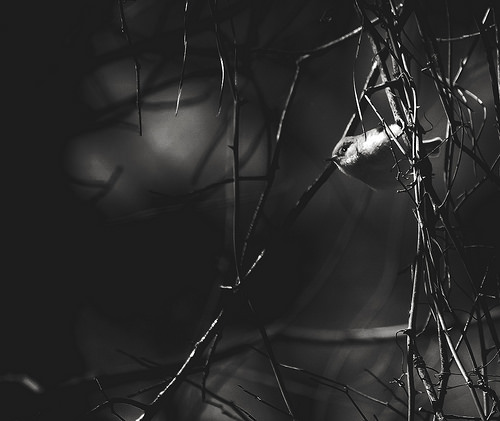

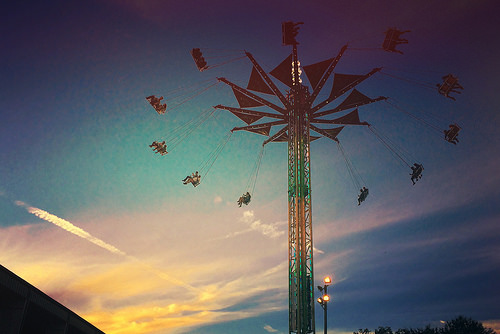

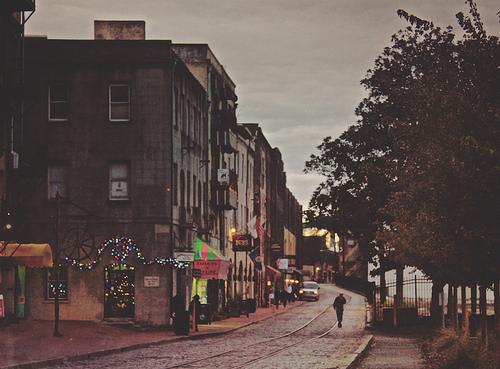

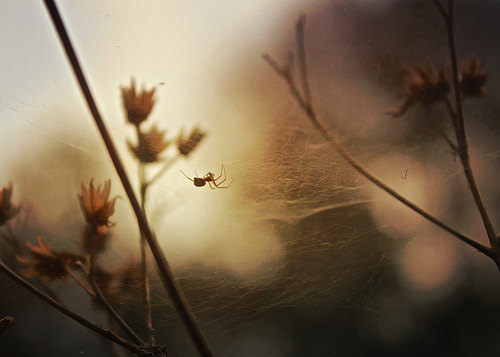

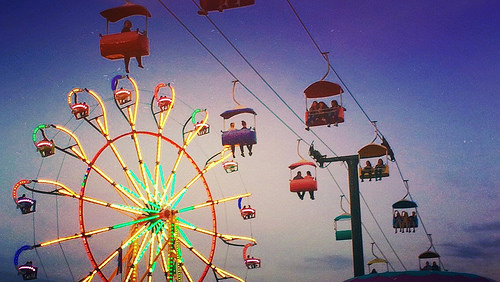

In [13]:
from PIL import Image
from StringIO import StringIO
from IPython import display

reqs = flickr.people.getPhotos(user_id = user)
photos = reqs['photos']['photo']
count = 0
for photo in photos:
    photo_req = flickr.photos.getSizes(photo_id = photo['id'])
    img_url = photo_req['sizes']['size'][5]['source']
    f = urllib2.urlopen(img_url)
    im = Image.open(StringIO(f.read()))
    display.display(im)
    count = count + 1
    if count == 5:
        break

## Contact List

In [17]:
reqs = flickr.contacts.getPublicList(user_id = user)
contacts = reqs['contacts']['contact']
for contact in contacts:
    print "-----------------------"
    print contact['username']

-----------------------
_lucidreams
-----------------------
adri_radiance
-----------------------
Albin Thelander
-----------------------
aleshurik
-----------------------
amychristine6
-----------------------
Andrine Bauge
-----------------------
annieschen
-----------------------
awatekiran
-----------------------
Azzam30
-----------------------
Bittersweet_whispers
-----------------------
Bjscribben
-----------------------
brendaolivia
-----------------------
brittneypanda
-----------------------
Cantwell Photo
-----------------------
Chase Mouser
-----------------------
Christopher J. Rivera
-----------------------
Cissy Bradley
-----------------------
collinmcadoo
-----------------------
Colton Witt
-----------------------
Derrick Freske
-----------------------
Elizabeth_211
-----------------------
Emma Aurelie
-----------------------
emmavanmeter
-----------------------
Felix Antoima
-----------------------
firedroplets
-----------------------
flightlessbird324
------------------

# Groups

## Search

In [19]:
reqs = flickr.groups.search(text = 'arduino')
groups = reqs['groups']['group']
for group in groups:
    print "-------------------"
    print group['name']
    print group['nsid']

-------------------
Arduino Projects
2154885@N24
-------------------
Arduino
46752819@N00
-------------------
Arduino-Gefrickel
1764555@N23
-------------------
arduino workshop 09
969820@N20
-------------------
London Arduino Group
2246854@N22
-------------------
LilyPad Arduino
912890@N22
-------------------
BricoGeek
1153834@N22
-------------------
Arduino Workshop Berlin / 20-21.06.09
1105227@N25
-------------------
SpikenzieLabs
1029960@N25
-------------------
Not Just Arduino
2198194@N20
-------------------
Fast Stacker (Arduino focus stacking macro rail)
2960405@N22
-------------------
JeeLabs
1481116@N23
-------------------
BarC3
663781@N23
-------------------
RayshobbyPhoto
1729559@N24
-------------------
Handmade Ideas
1727115@N24
-------------------
Tinker.kr
900974@N20
-------------------
Seeed Studio Projects
1487824@N22
-------------------
Geek Girl Workshop
1800809@N23
-------------------
Tech Weakly Podcast Photos
900721@N24
-------------------
SainSmart
2226267@N23
----

## Group Info

In [22]:
groupId = '2154885@N24'

In [26]:
reqs = flickr.groups.getInfo(group_id = groupId)
print reqs['group']['name']['_content']
print reqs['group']['description']['_content']
print "Number of members: " + reqs['group']['members']['_content']

Arduino Projects
You're welcome in posting pictures of your Arduino projects!

Please, put the name of the Arduino board you are using in the Tag and/or description of the pictures.
Number of members: 199


## Group Photos

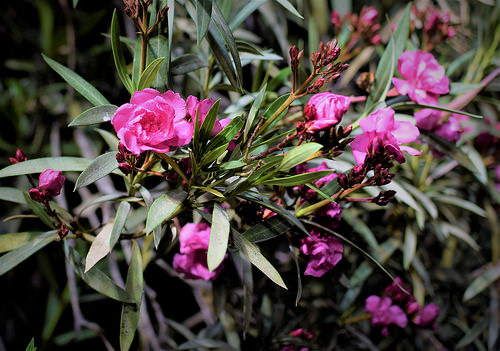

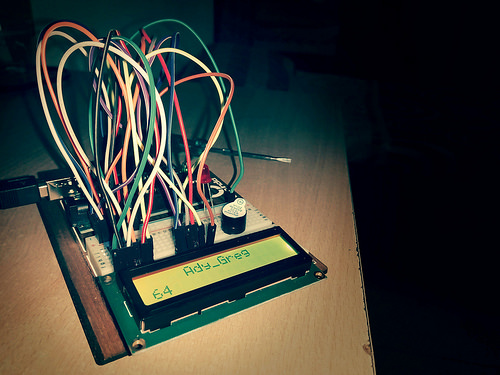

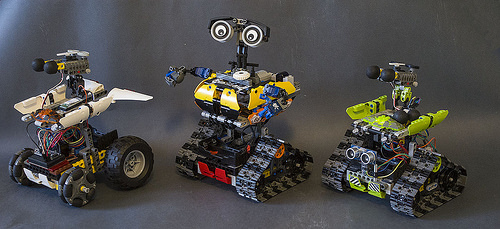

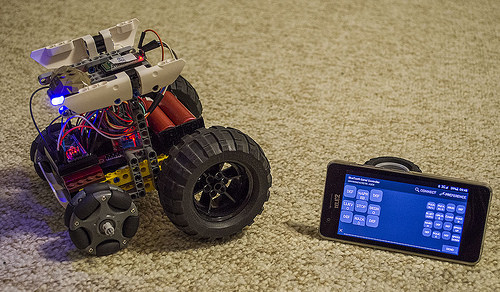

ConnectionError: HTTPSConnectionPool(host='api.flickr.com', port=443): Max retries exceeded with url: /services/rest/?photo_id=29711670753&nojsoncallback=1&method=flickr.photos.getSizes&format=json (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7f8d7005d350>: Failed to establish a new connection: [Errno 101] Network is unreachable',))

In [27]:
reqs = flickr.groups.pools.getPhotos(group_id = groupId)
photos = reqs['photos']['photo']
count = 0
for photo in photos:
    photo_req = flickr.photos.getSizes(photo_id = photo['id'])
    img_url = photo_req['sizes']['size'][5]['source']
    f = urllib2.urlopen(img_url)
    im = Image.open(StringIO(f.read()))
    display.display(im)
    count = count + 1
    if count == 5:
        break

# Photo Search

In [14]:
extras='url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'
reqs = flickr.photos.search(text='arduino', per_page=5, extras=extras)
photos = reqs['photos']
from pprint import pprint
pprint(photos)

{u'page': 1,
 u'pages': 24205,
 u'perpage': 5,
 u'photo': [{u'farm': 1,
             u'height_c': 800,
             u'height_l': u'1024',
             u'height_m': u'500',
             u'height_n': 320,
             u'height_q': u'150',
             u'height_s': u'240',
             u'height_sq': 75,
             u'height_t': u'100',
             u'height_z': u'640',
             u'id': u'31928990362',
             u'isfamily': 0,
             u'isfriend': 0,
             u'ispublic': 1,
             u'owner': u'29100410@N08',
             u'secret': u'3f39e9ce09',
             u'server': u'322',
             u'title': u'Piano banana - Cumbuca Labs',
             u'url_c': u'https://farm1.staticflickr.com/322/31928990362_3f39e9ce09_c.jpg',
             u'url_l': u'https://farm1.staticflickr.com/322/31928990362_3f39e9ce09_b.jpg',
             u'url_m': u'https://farm1.staticflickr.com/322/31928990362_3f39e9ce09.jpg',
             u'url_n': u'https://farm1.staticflickr.com/322/3192899036

31928990362
Piano banana - Cumbuca Labs


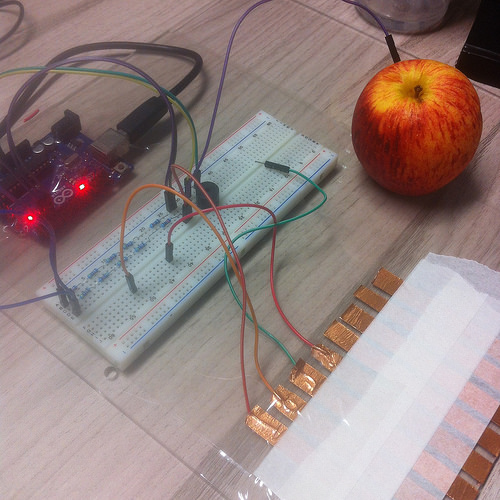

32038368196
Piano banana - Cumbuca Labs


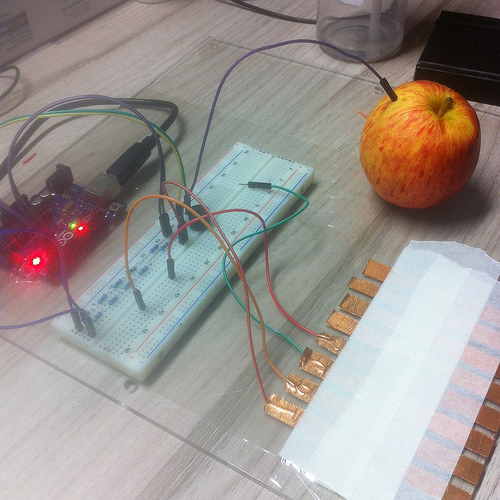

32038367266
Piano banana - Cumbuca Labs


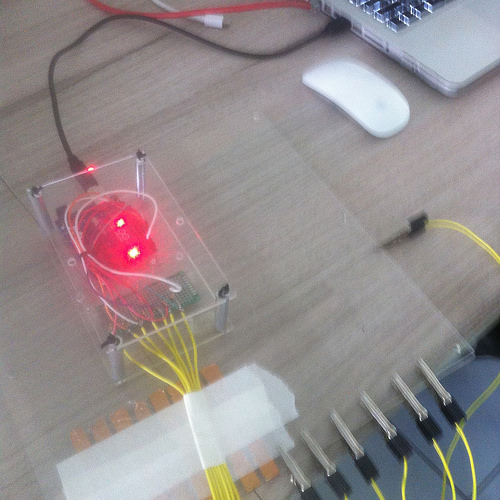

31928988362
Piano banana - Cumbuca Labs


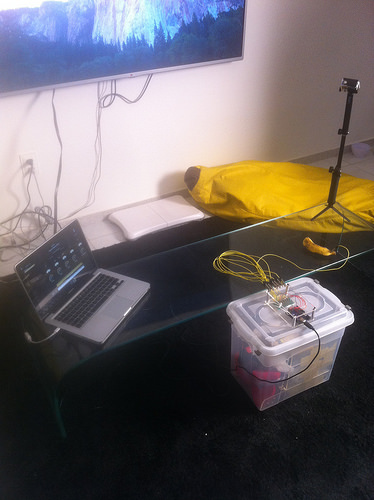

32077427425
Piano banana - Cumbuca Labs


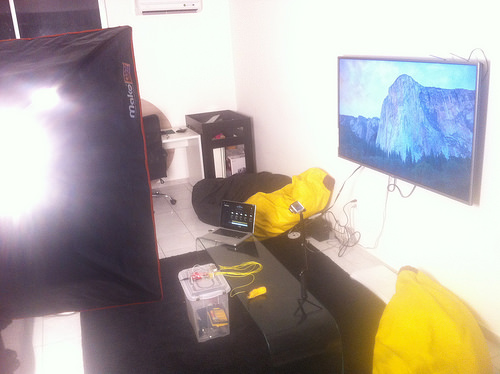

In [15]:
from PIL import Image
from StringIO import StringIO
from IPython import display

for photo in photos['photo']:
    print photo['id']
    print photo['title']
    img_url = photo['url_m']
    f = urllib2.urlopen(img_url)
    im = Image.open(StringIO(f.read()))
    display.display(im)